## Data Inspection

In [203]:

import numpy as np
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [204]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [206]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [207]:
df.dteday = pd.to_datetime(df.dteday,errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [208]:
dummy_df = pd.get_dummies(df,columns=['season', 'mnth', 'weekday', 'weathersit', 'yr'],drop_first=True)

dummy_df.head()

,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,yr_1
0,1,2011-01-01,0,0,0.344167,0.363625,0.805833,0.160446,331,654,...,False,False,False,False,False,False,True,True,False,False
1,2,2011-01-02,0,0,0.363478,0.353739,0.696087,0.248539,131,670,...,False,False,False,False,False,False,False,True,False,False
2,3,2011-01-03,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,...,False,True,False,False,False,False,False,False,False,False
3,4,2011-01-04,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,...,False,False,True,False,False,False,False,False,False,False
4,5,2011-01-05,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,...,False,False,False,True,False,False,False,False,False,False


## EDA


How does temperature affect the number of rentals?


In [209]:
# plt.figure(figsize=(10,6))
# sns.scatterplot(x=dummy_df.temp,y=dummy_df.cnt)
# plt.xlabel("Normalized Temperature")
# plt.ylabel("Rental Count")
# plt.title("Temperature vs Rental Count")
# plt.grid(True)
# plt.show()
fig_temp = px.scatter(
    dummy_df,
    x='temp',
    y='cnt',
    title='Normalized Temperature vs Rental Count',
    labels={'temp': 'Normalized Temperature', 'cnt': 'Rental Count'},

)
fig_temp.show()

Are there more rentals on weekends or weekdays?

In [210]:
# plt.figure(figsize=(2,4))
# sns.barplot(x=dummy_df.workingday,y=dummy_df.cnt)
# plt.xlabel("Working Day")
# plt.ylabel("Rental Count")
# plt.title("Working Day vs Rental Count")
# plt.grid(True)
# plt.show()
fig_weekday = px.box(
    dummy_df,
    x='workingday',
    y='cnt',
    title='Working Day vs Rental Count',
    labels={'workingday': 'Working day', 'cnt': 'Rental Count'},
    template='plotly_dark',
    color='workingday',
)
fig_weekday.show()

What’s the overall distribution of rentals per day?

In [211]:
fig_hist = px.bar(
    dummy_df,
    x='dteday',
    y='cnt',
    title='Date vs Rental Count',
    labels={'dteday': 'Date', 'cnt': 'Rental Count'},
    color='cnt',
    template='plotly_dark'
)
fig_hist.show()

## Model Building

In [212]:
# dummy_df.info()

In [213]:
X = dummy_df.drop(['cnt','registered','casual','dteday','instant'], axis=1)
Y = dummy_df['cnt']

In [214]:
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [215]:
lr_model = LinearRegression()

lr_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Model Evaluation

In [216]:
Y_pred = lr_model.predict(X_test)

In [217]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"Linear Regression (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f} bikes")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} bikes")

Linear Regression (R²): 0.84
Mean Absolute Error (MAE): 583.02 bikes
Root Mean Squared Error (RMSE): 796.46 bikes


In [218]:
from sklearn.ensemble import RandomForestRegressor

features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
            'weathersit', 'temp', 'hum', 'windspeed']
X = df[features]
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mse)
print(f"Random Forest R²: {r2_rf:.2f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f} bikes")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f} bikes")

Random Forest R²: 0.88
Mean Absolute Error (MAE): 431.96 bikes
Root Mean Squared Error (RMSE): 796.46 bikes


In [219]:
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# plt.figure(figsize=(10, 6))
# sns.barplot(x='importance', y='feature', data=feature_importance_df)
# plt.title('Most Important Features for Predicting Bike Rentals')
# plt.xlabel('Importance Score')
# plt.ylabel('Feature')
# plt.show()

fig_imp = px.bar(
    feature_importance_df,
    x = 'importance',
    y = 'feature',
    title='Most Important Feature for Predicting Bike Rental',
    labels={'importance': 'Importance Score', 'feature': 'Features'},
    template='plotly_dark'
)
fig_imp.show()

## Conclusion

Based on the performance metrics, the recommendation is straightforward.

The Random Forest model is recommended. It provided a more accurate prediction of daily bike rentals, as evidenced by its higher R2 score (explaining more of the variance in the data) and lower average error (MAE/RMSE). Its ability to capture complex, non-linear relationships makes it better suited for this problem than a simple linear model.

### Linear Regression
______
R-squared (R²): 0.84

Mean Absolute Error (MAE): 583.02 bikes

Root Mean Squared Error (RMSE): 796.46 bikes

### Random Forest
_____
R-squared (R²): 0.88

Mean Absolute Error (MAE): 431.96 bikes

Root Mean Squared Error (RMSE): 796.46 bikesm

### Most Important Feature

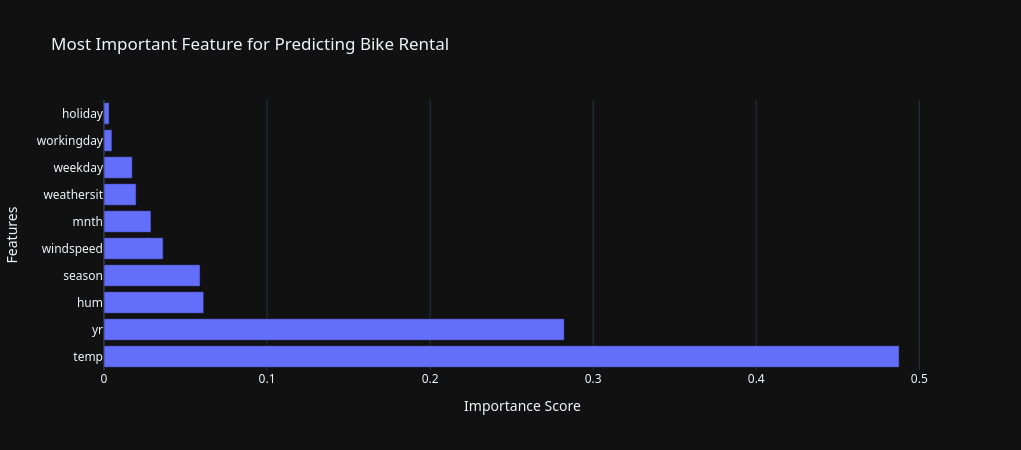

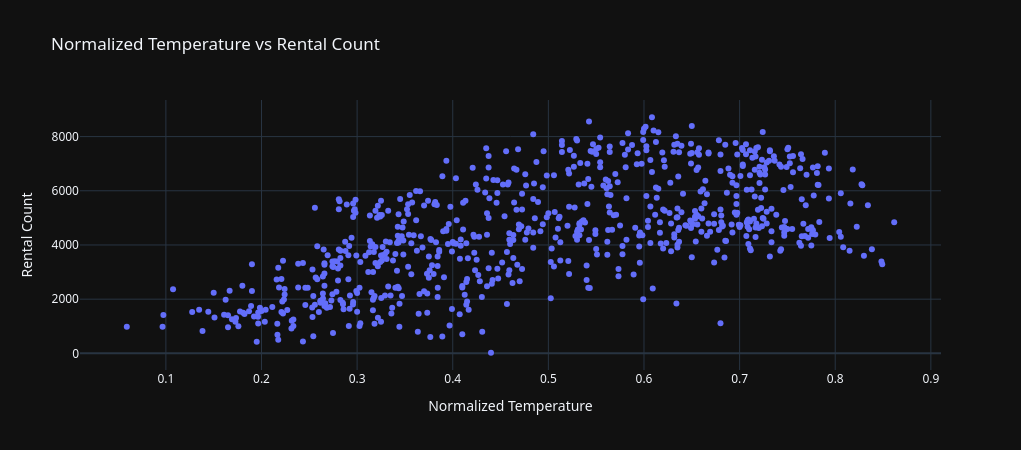
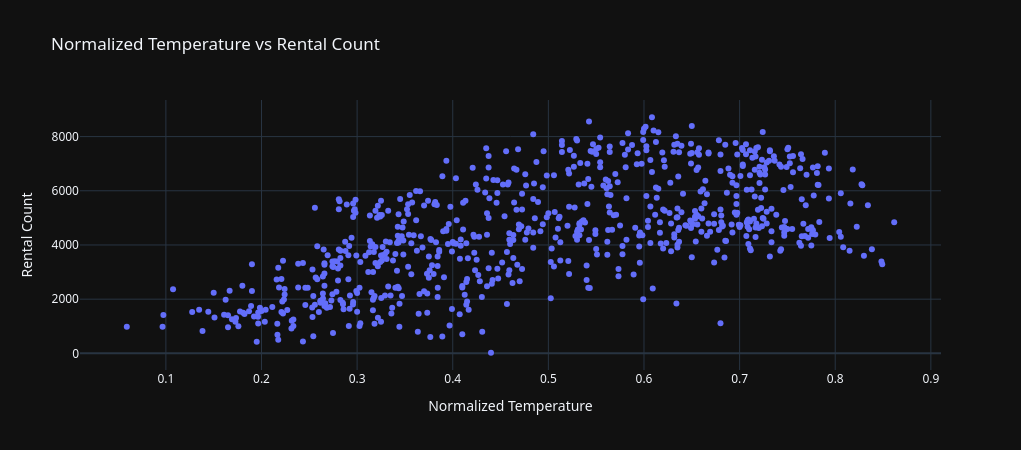
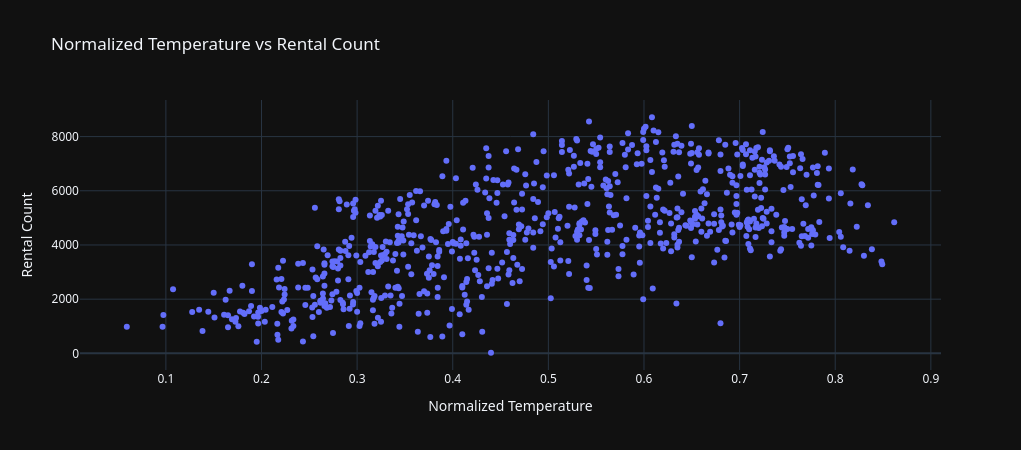
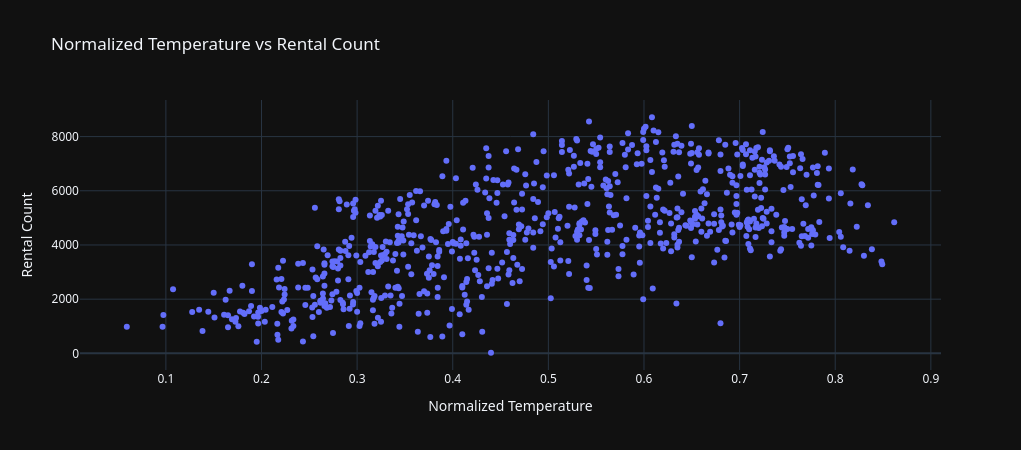

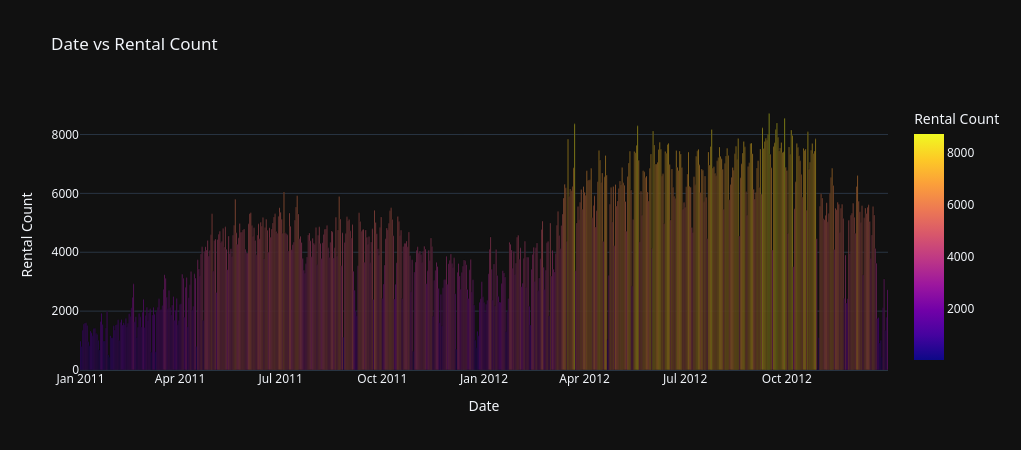

As we can see in the above images the temp (temperature) and yr (year) are the two most important predictors. This makes perfect sense: people are highly influenced by the weather, and the bike-sharing service grew in popularity from 2011 to 2012.